<a href="https://colab.research.google.com/github/GurungVinivesh/Retail_analysis/blob/main/Retail_analysis_3_sep_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermart Grocery Sales - Retail Analytics Dataset**

This project focuses on using a dataset containing information about grocery sales at a supermart. The dataset includes columns such as Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount,
Profit, State, month_no, Month, and year. We’ll explore this data, perform
feature engineering, and build a machine learning model to predict sales or profit. <br>
<br>
Now to start our analysis:

### **Step-1: Import required libraries** <br>
First, let's import some important libraries for data manipulation, visualization and machine learning.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

### **Step-2: Load the dataset** <br>
Now we will load the csv file which contains the dataset

In [2]:
#Load the dataset
data = pd.read_csv('Supermart_Retail_dataset.csv')

In [3]:
#Display the first few rows of the dataset
data.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [4]:
#Check the datatype of the columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
#Let's check the dimensions of the data also
data.shape

(9994, 11)

### **Step-3: Data preprocessing** <br>
Here we will check for missing values, convert the neccessary data to required foramt and Convert categorical values such as category, sub category, region, state and month into numerical values.

In [6]:
#Checking for any null values
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [19]:
#As we have no null values present in the dataset, we will proceed to next process
#Let's change the datatype of order date from object to date
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='ignore')

In [20]:
#Now check the changed datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 859.0+ KB


In [23]:
#As we can see the data is not stored in datetime64 format
#Now applying grouby function to group the data to a category

df = data.groupby('Category')
df.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,2015-09-06,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,2015-09-06,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,2015-09-06,West,1903,0.13,437.69,Tamil Nadu


In [24]:
#Now we want the total sale by category
#First, group by the category and get the total number of sales for each category

sales_cat = data.groupby('Category')['Sales'].sum()

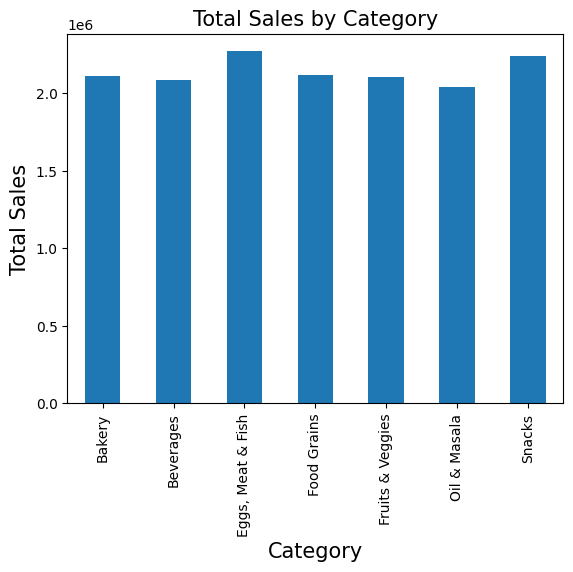

In [27]:
#Now we will create a plot of sales by category to have a visualization of the data
sales_cat.plot(kind = 'bar')
plt.title('Total Sales by Category', fontsize = 15)
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

The eggs,meat and fish contributes the most to the sales, it has more sales than any other product so the company can invest more in it.

In [30]:
#Extract month from the order date
data['month_no'] = data['Order Date'].dt.month
data['Month'] = pd.to_datetime(data['Order Date']).dt.strftime('%B')
data['year'] = data['Order Date'].dt.year

In [31]:
#Check the data that has been added to the columns
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,8.0,August,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,8.0,August,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,12.0,December,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,11.0,November,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,11.0,November,2016.0


In [38]:
#Convert the categorical variables such as category, sub category, city, region, state and month into numerical values.

#Intialize the label encoder
le = LabelEncoder()

#Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Month'])

In [39]:
#Display first few columns of encoding
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,8.0,August,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,8.0,August,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,12.0,December,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,11.0,November,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,11.0,November,2016.0


### **Step-4: Exploratry Data Analysis** <br>
Creating plots for monthly sales and yearly sales.

In [40]:
#Now we will sum the sales by month
m_sales = data.groupby('Month')['Sales'].sum().reset_index()

In [41]:
#Now we will sort the data by month
m_sales_sort = m_sales.sort_values(by = 'Month')

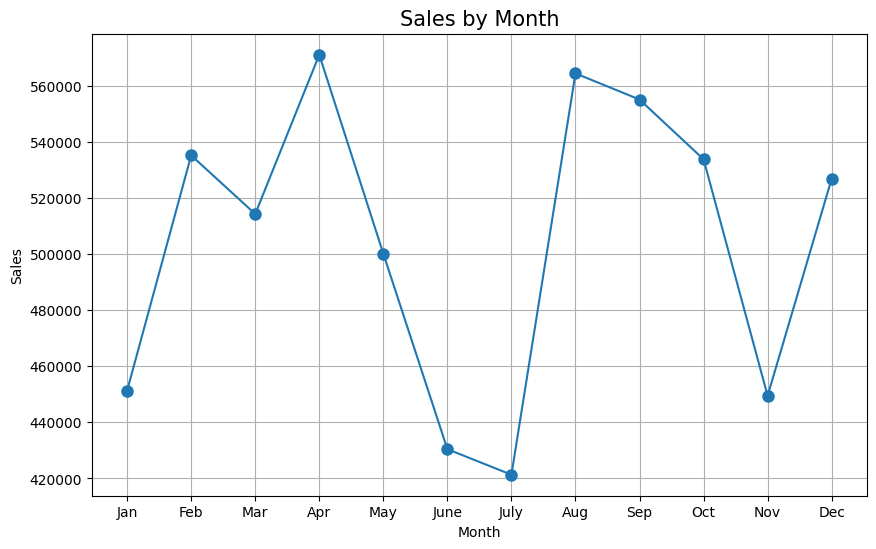

In [42]:
#Creating a line plot for visualization
plt.figure(figsize = (10,6))
plt.plot(m_sales_sort['Month'], m_sales_sort['Sales'], marker = 'o', markersize = 8)
plt.title('Sales by Month', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)
plt.xticks(m_sales_sort['Month'],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
                                  'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The sales increases a little as the month increases, but decreases in between june and july, but also recovers fastly which shows that the company devised a better and suitable plan to increase sales at each point in time.

In [43]:
#Now we want to find the yearly sales
#We will group the years and get the total number of sales for each year
y_sales = data.groupby('year')['Sales'].sum()

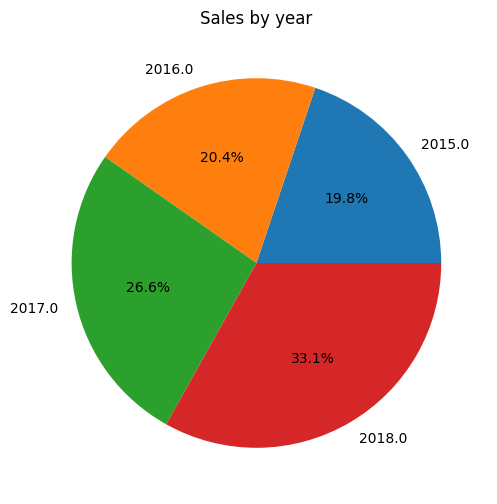

In [44]:
#Pie chart will be created for yearly sales
plt.figure(figsize = (10,6))

plt.pie(y_sales, labels = y_sales.index, autopct='%1.1f%%' )
plt.title('Sales by year')
plt.show()

As shown in the above chart that the 2017 and 2018 has more than 50% of sales which implies the sales increases as the year increases.

<ipython-input-49-b3b405bdaf47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Category', y = 'Sales', data = data, palette  = 'Set2', legend = False)


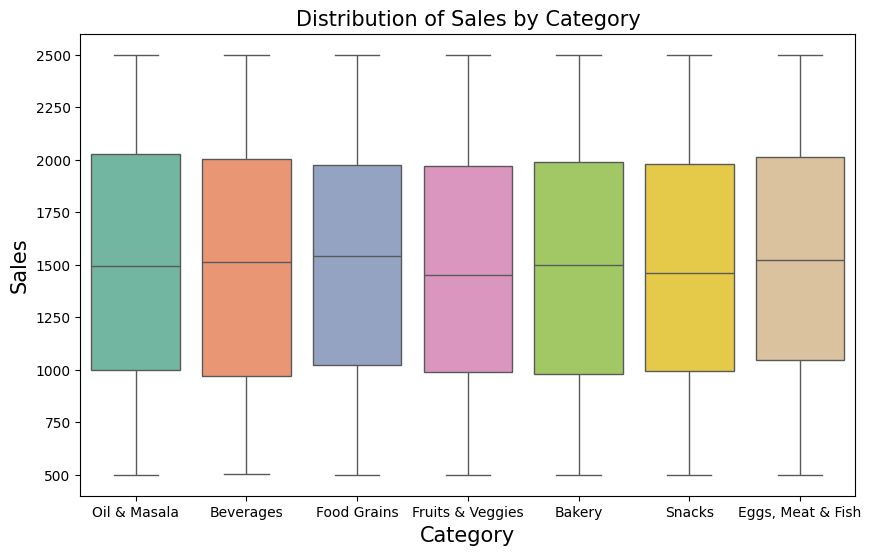

In [49]:
#Distribution of sales by category
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Category', y = 'Sales', data = data, palette  = 'Set2', legend = False)
plt.title('Distribution of Sales by Category', fontsize = 15)
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Sales', fontsize = 15)
plt.show()

As the distribution of sales goes we can see that the eggs, meat and fish are most favored category.

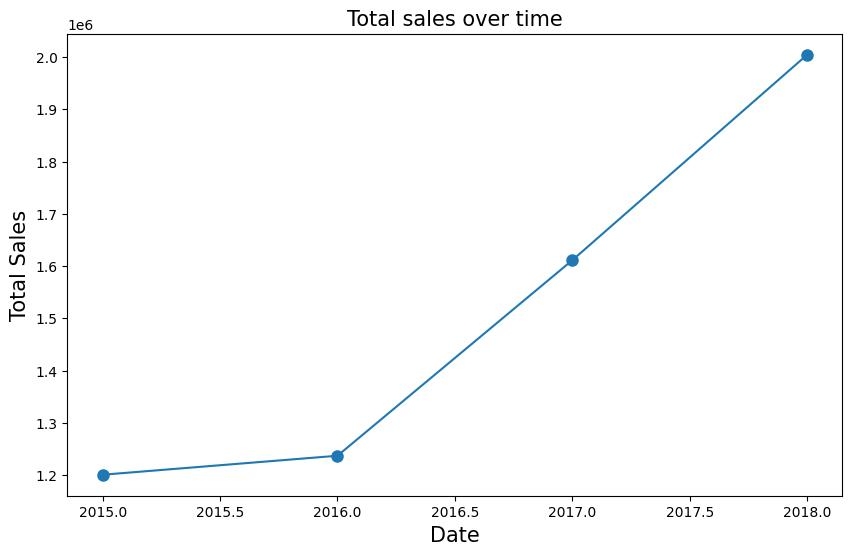

In [50]:
#Sales trend over time
plt.figure(figsize = (10,6))
data.groupby('year')['Sales'].sum().plot(kind = 'line', marker = 'o', markersize = 8)
plt.title('Total sales over time', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.show()

Shown in line chart above, the total sales increases as the date increases.

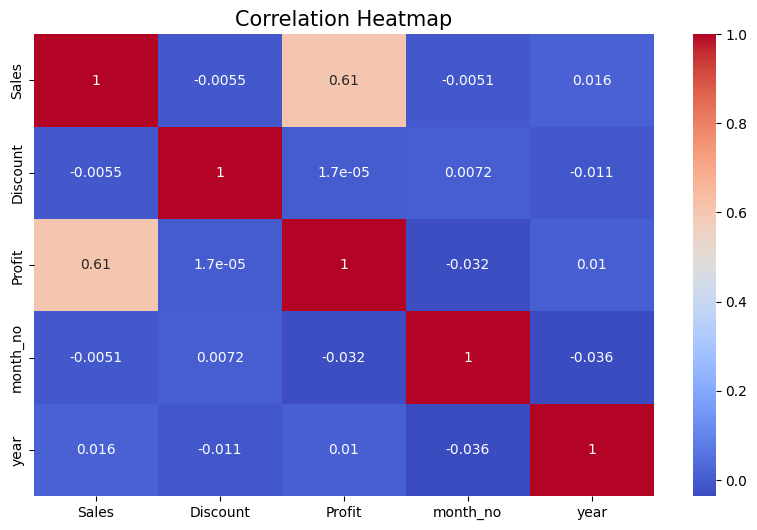

In [52]:
#Now we will make a correlation heatmap

plt.figure(figsize = (10,6))

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

#calculate the correlation
corl_mat = numeric_data.corr()
sns.heatmap(corl_mat, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap', fontsize = 15)
plt.show()

### **Step-7: Evaluate the model** <br>
Evaluate the model performance using Mean Squared Error (MSE) and R-squared

In [56]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'month_no', 'Month', 'year'],
      dtype='object')

In [102]:
features = ['Sales', 'Discount', 'Profit', 'month_no', 'year']
x = data[features]
y = data['Sales']

In [88]:
print(pd.isnull(x).sum())  # Check for NaNs in each column of X
print(pd.isnull(y).sum())  # Check for NaNs in y

Sales          0
Discount       0
Profit         0
month_no    5952
year        5952
dtype: int64
0


In [113]:
from sklearn.impute import SimpleImputer

# Handle missing values for x (features) and y (target)
imputer = SimpleImputer(strategy='mean')  # Use mean strategy to fill NaN values
x = imputer.fit_transform(x)
y = imputer.fit_transform(y.reshape(-1, 1)).flatten()  # Reshape y to a 1D array

In [116]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [118]:
# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [120]:
# Make predictions
y_pred = model.predict(x_test)

In [121]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [122]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.766201122531098e-27
R-squared: 1.0


### **Step-8: Visualize the results** <br>


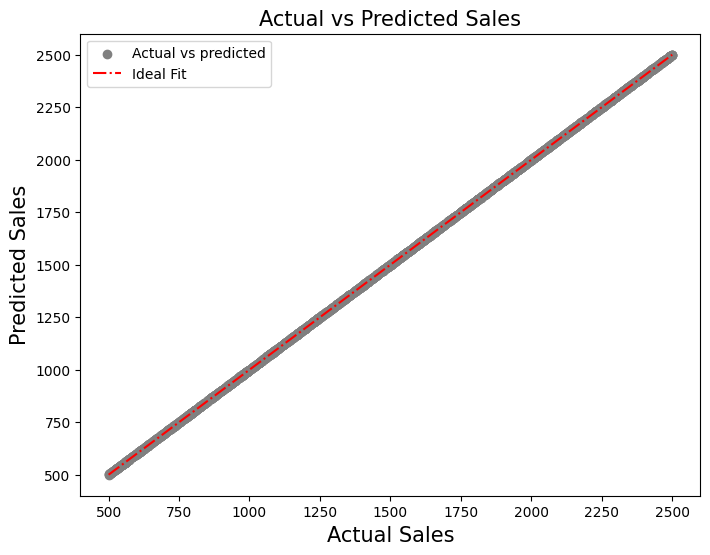

In [137]:
#Actual and predicted sales
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred,  color='0.5', label = 'Actual vs predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.', label='Ideal Fit')
plt.title('Actual vs Predicted Sales', fontsize = 15)
plt.xlabel('Actual Sales', fontsize = 15)
plt.ylabel('Predicted Sales', fontsize = 15)
plt.legend()
plt.show()

### **Step-9: Conclusion**

* The linear regression model provided a reasonable prediction for sales based on the features selected.
* The model’s R-squared value indicates a good fit, explaining a significant
portion of the variance in sales.
* Further refinement of the model could involve trying different machine learning algorithms, such as decision trees or ensemble methods.

